- Lennard-Jones potential
$$V(r) = 4\epsilon \left[ \left(\frac{\sigma}{r}\right)^{12} - \left(\frac{\sigma}{r}\right)^6 \right]$$
- The force is $\mathbf{F} = -\mathbf{\Delta V}$. If we treat each interaction as a 1-D interaction, then

\begin{align*}
F &= -\frac{d}{dr}V(r) \\
&= -24\epsilon \left(\frac{\sigma}{r} \right)^5 \left(\frac{-\sigma}{r^2} \right) \left[\left(\frac{\sigma}{r} \right)^6 - 1 \right] - 24\epsilon \left(\frac{\sigma}{r} \right)^6 \left[\left(\frac{-\sigma}{r^2}\right) \left(\frac{\sigma}{r} \right)^5 \right] \\
&= 24\epsilon \left(\frac{1}{r} \right) \left(\frac{\sigma}{r} \right)^6 \left[2 \left(\frac{\sigma}{r} \right)^6 - 1 \right]
\end{align*}

- Introduce dimensionless variables $V \rightarrow V/\epsilon$ and $r \rightarrow r/\sigma$.
- The potential energy $U$ is the sum of two-particle interactions, i.e., $$U = V(r_{12})+V(r_{13}) + \cdots + V(r_{23}) + \cdots = \displaystyle \sum_{i<j=1}^N V(r_{ij})$$ where $\mathbf{r_{ij}}$ is the distance between particles.
- The average energy is
$$\langle E \rangle = \frac{1}{2}m(\langle v^2 \rangle - \langle v \rangle ^2)$$

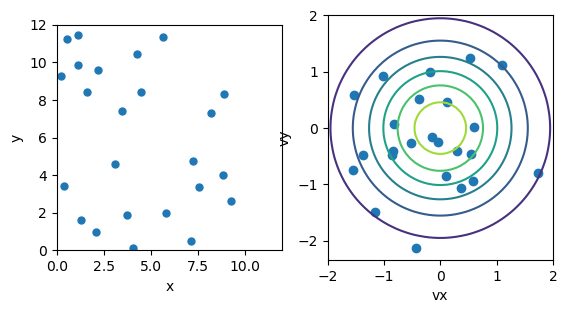

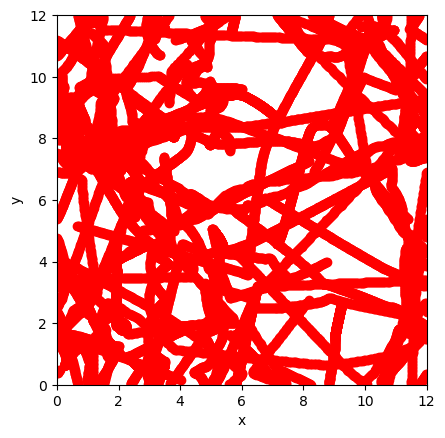

1.175176823837643 0.37482791122514314 0.6122319096756907


c:\Users\rokka\anaconda3\lib\site-packages\matplotlib\animation.py:884: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you output the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(


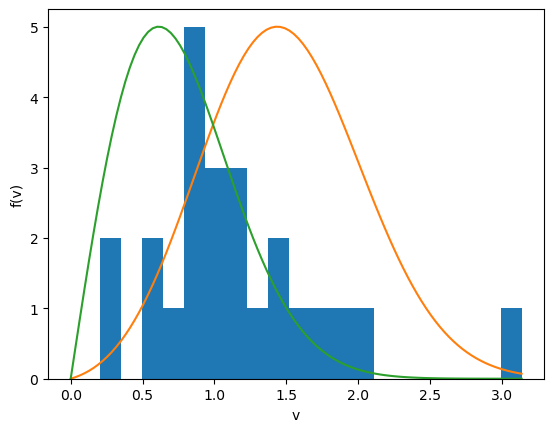

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

class particles:  #class to hold particle information

    def __init__(self,N,vmax,Lx,Ly,dt,tfinal,sigma,epsilon):
        self.N = N
        self.x = np.random.rand(N)*Lx
        self.y = np.random.rand(N)*Ly
        self.vmax = vmax
        self.vx = (-1 + 2*np.random.rand(N))*vmax
        self.vy = (-1 + 2*np.random.rand(N))*vmax
        self.ax = np.zeros(N)
        self.ay = np.zeros(N)
        self.Lx = Lx
        self.Ly = Ly
        self.dt = dt
        self.tfinal = tfinal
        self.sigma = sigma
        self.epsilon = epsilon

def Maxwellian(p): #monte carlo Maxwellian initialization
    vs = p.vmax*np.sqrt(-2*np.log(np.random.rand(p.N)))
    rtheta = np.random.rand(p.N)
    p.vx = vs*np.cos(2*np.pi*rtheta)
    p.vy = vs*np.sin(2*np.pi*rtheta)
    return
 
def plot_particles(p):
    def max_func(p,vx,vy):
        F = np.exp(-(vx**2 + vy**2)/(2*p.vmax**2))
        return F
    fig, ax = plt.subplots(1,2)
    ax[0].plot(p.x,p.y,'o',markersize=5.0)
    ax[0].set_xlabel('x')
    ax[0].set_ylabel('y')
    ax[0].set_xlim([0,p.Lx])
    ax[0].set_ylim([0,p.Ly])
    ax[0].set_aspect('equal')
    ax[1].plot(p.vx,p.vy,'o')
    ax[1].set_xlabel('vx')
    ax[1].set_ylabel('vy')
    ax[1].set_aspect('equal')
    vx = np.linspace(-p.vmax*2, p.vmax*2, 50)
    vy = np.linspace(-p.vmax*2, p.vmax*2, 50)
    vX, vY = np.meshgrid(vx, vy)
    Z = max_func(p,vX, vY)
    ax[1].contour(vX,vY,Z)
    plt.show()

def plot_distribution(p):
    plt.figure(2)
    vbar, vbar2, dv2 = mean_v(p)
    print(vbar,dv2,np.sqrt(dv2))
    h = plt.hist(np.sqrt(p.vx**2 + p.vy**2),bins=20,density=False)
    v = np.linspace(0,max(np.sqrt(p.vx**2 + p.vy**2)),100)
    fv = v*np.exp(-(v-vbar)**2/(2*dv2))
    fv1 = v*np.exp(-(v)**2/(2*dv2))
    plt.plot(v,fv*np.max(h[0])/np.max(fv))
    plt.plot(v,fv1*np.max(h[0])/np.max(fv1))
    plt.xlabel('v')
    plt.ylabel('f(v)')
    
    plt.show()
    return
 
def Force(p,r,dx,dy):
    ri = sigma/r
    ri3 = ri**3
    ri6 = ri3**2
    F = 24*epsilon*(1/r)*ri6*(2*ri6 - 1)/r
    if (F > 100.0):
        F = 100.0
    return F


def periodic(p):
    p.x[p.x < 0] = p.x[p.x < 0] + p.Lx
    p.y[p.y < 0] = p.y[p.y < 0] + p.Ly
    p.x[p.x > p.Lx] = p.x[p.x > p.Lx] - p.Lx
    p.y[p.y > p.Ly] = p.y[p.y > p.Ly] - p.Ly
    return

def separation(p,dx,dy):
    if (abs(dx) > 0.5*p.Lx):
        dx = dx - np.sign(dx)*p.Lx
    if (abs(dy) > 0.5*p.Ly):
        dy = dy - np.sign(dy)*p.Ly
    return dx, dy
 
def Accel(p):
    p.ax = np.zeros(p.N)
    p.ay = np.zeros(p.N)
    for i in range(p.N-1): 
        for j in range(i+1,p.N):
            dx = p.x[i] - p.x[j]
            dy = p.y[i] - p.y[j]
            dx, dy = separation(p,dx,dy)
            r = np.sqrt(dx*dx + dy*dy)
            F = Force(p,r,dx,dy)
            p.ax[i] = p.ax[i] + F*dx
            p.ay[i] = p.ay[i] + F*dy
            p.ax[j] = p.ax[j] - F*dx #Newton's third law
            p.ay[j] = p.ay[j] - F*dy
    return

def Verlet(p):
    p.x = p.x + p.vx*dt + 0.5*p.ax*p.dt**2
    p.y = p.y + p.vy*dt + 0.5*p.ay*p.dt**2
    p.vx = p.vx + 0.5*p.ax*p.dt
    p.vy = p.vy + 0.5*p.ay*p.dt
    periodic(p)
    Accel(p)
    p.vx = p.vx + 0.5*p.ax*p.dt
    p.vy = p.vy + 0.5*p.ay*p.dt
    return

def move_particles(p,nstep):
    time = 0.0
    cnt = 0
    lines=[]
    fig, ax = plt.subplots()
    while time < p.tfinal:
        Verlet(p)
        time = time + p.dt
        #print('time...',time/p.tfinal,energy(p))
        if (cnt == nstep):
            p1 = ax.plot(p.x,p.y,'ro')
            lines.append(p1)
            ax.set_aspect('equal')
            ax.set_xlim(0,p.Lx)
            ax.set_ylim(0,p.Ly)
            ax.set_xlabel('x')
            ax.set_ylabel('y')
            cnt = 0
        cnt += 1
    ani = animation.ArtistAnimation(fig, lines, interval=1)
    plt.show()
    return

def mean_v(p):
    v = np.sqrt(p.vx**2 + p.vy**2)
    vbar = np.sum(v)/p.N
    vbar2 = np.sum(v**2)/p.N
    dv2 = vbar2 - vbar**2
    return vbar,vbar2,dv2

def energy(p):
    E = np.sum(p.vx**2 + p.vy**2)
    return E

#------------------------------------------------------------------------------------

N = 24          #number of particles
Lx = 12         #x size of box
Ly = 12         #y size of box
sigma = 0.5     #close interaction length scale
epsilon = 1.0   #Depth of potential well
m = 1.0         #mass
tau = np.sqrt(m*sigma**2*epsilon)       #non dimensional time scale
dt = 0.005                              #time step
tfinal=dt*4000                          #final time
vmax = 1.0*np.sqrt(epsilon/m)           #non dimensional thermal velocity

p = particles(N,vmax,Lx,Ly,dt,tfinal,sigma,epsilon)     #initiate data structure
Maxwellian(p)               #initialize particles with Maxwellian velocity distribution based on vmax.
plot_particles(p)           #plot distribution
nstep = 4                   #number of time steps between animation frames.
move_particles(p,nstep)     #run the simulation
plot_distribution(p)        #examine velocity distribution.